In [76]:
from textblob import TextBlob 
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import matplotlib
import nltk
import re
nltk.download('stopwords')
nltk.download('punkt')
nltk.download('punkt_tab')
nltk.download('averaged_perceptron_tagger')
from collections import Counter
sns.set()

[nltk_data] Downloading package stopwords to
[nltk_data]     /Users/gideon/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package punkt to /Users/gideon/nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package punkt_tab to
[nltk_data]     /Users/gideon/nltk_data...
[nltk_data]   Package punkt_tab is already up-to-date!
[nltk_data] Downloading package averaged_perceptron_tagger to
[nltk_data]     /Users/gideon/nltk_data...
[nltk_data]   Package averaged_perceptron_tagger is already up-to-
[nltk_data]       date!


In [77]:
# Tokenization

In [78]:
myfile = open('20th_century_Wiki.txt', encoding='utf-8')

In [79]:
# Import txt file

with open('20th_century_Wiki.txt', 'r', errors='ignore') as file:
    data = file.read().replace('\n', '')

In [80]:
# Sentence tokenization 

from nltk.tokenize import sent_tokenize
tokenized_sent = sent_tokenize(data)
print(tokenized_sent)

['Key events of the 20th century - WikipediaJump to contentMain menuMain menumove to sidebarhide\t\tNavigation\tMain pageContentsCurrent eventsRandom articleAbout WikipediaContact us\t\tContribute\tHelpLearn to editCommunity portalRecent changesUpload fileSearchSearchDonateAppearanceCreate accountLog inPersonal tools Create account Log in\t\tPages for logged out editors learn moreContributionsTalkContentsmove to sidebarhide(Top)1Historic events in the 20th centuryToggle Historic events in the 20th century subsection1.1World at the beginning of the century1.1.1"The war to end all wars": World War I (1914–1918)1.1.2Russian Revolution and communism1.2Between the wars1.2.1Economic depression1.2.2The rise of dictatorship1.3Global war: World War II (1939–1945)1.3.1The war in Europe1.3.2Blitzkrieg1.3.3Operation Barbarossa1.3.4Turning tides1.3.5Operation Overlord1.3.6Final days1.3.7The war in the Pacific1.3.7.1Background1.3.8Japanese Expansion1.3.9Allied offensive1.3.10Final days1.3.11The Holo

In [81]:
# Word tokenization

from nltk.tokenize import word_tokenize
tokenized_word = word_tokenize(data)
print(tokenized_word)

['Key', 'events', 'of', 'the', '20th', 'century', '-', 'WikipediaJump', 'to', 'contentMain', 'menuMain', 'menumove', 'to', 'sidebarhide', 'Navigation', 'Main', 'pageContentsCurrent', 'eventsRandom', 'articleAbout', 'WikipediaContact', 'us', 'Contribute', 'HelpLearn', 'to', 'editCommunity', 'portalRecent', 'changesUpload', 'fileSearchSearchDonateAppearanceCreate', 'accountLog', 'inPersonal', 'tools', 'Create', 'account', 'Log', 'in', 'Pages', 'for', 'logged', 'out', 'editors', 'learn', 'moreContributionsTalkContentsmove', 'to', 'sidebarhide', '(', 'Top', ')', '1Historic', 'events', 'in', 'the', '20th', 'centuryToggle', 'Historic', 'events', 'in', 'the', '20th', 'century', 'subsection1.1World', 'at', 'the', 'beginning', 'of', 'the', 'century1.1.1', "''", 'The', 'war', 'to', 'end', 'all', 'wars', "''", ':', 'World', 'War', 'I', '(', '1914–1918', ')', '1.1.2Russian', 'Revolution', 'and', 'communism1.2Between', 'the', 'wars1.2.1Economic', 'depression1.2.2The', 'rise', 'of', 'dictatorship1.3

In [82]:
# Create frequency distribution

from nltk.probability import FreqDist
dist_words = FreqDist(tokenized_word)
print(dist_words)

<FreqDist with 4795 samples and 20886 outcomes>


In [83]:
dist_words.most_common(10)

[('.', 1283),
 ('the', 1095),
 (',', 965),
 ('of', 603),
 ('and', 397),
 ('to', 326),
 ('[', 302),
 (']', 302),
 ('The', 300),
 ('in', 290)]

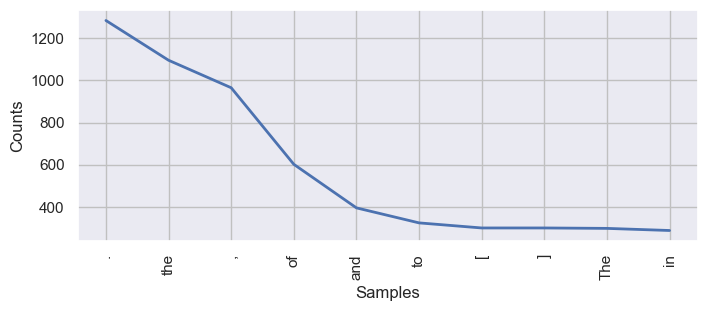

In [84]:
# Frequency Distribution Plot

plt.figure(figsize=(8, 3))
dist_words.plot(10,cumulative = False)
plt.show()

In [85]:
from nltk.corpus import stopwords
stop_words = set(stopwords.words("english"))
print(stop_words)

{'that', 'your', 're', 've', "mightn't", 'the', 'same', 's', 'of', 'how', 'doing', 'below', "needn't", 'his', "you'd", "hasn't", 'itself', 'i', "wouldn't", "you'll", 'then', 'o', 'once', 'when', 'does', 'with', 'some', 'those', 'me', 'doesn', "hadn't", 'did', 'no', 'about', 'too', 'will', 'can', 'where', 'own', 'was', 'our', "you've", 'and', 'after', 'ours', 'to', 'didn', 'needn', "isn't", 'is', 'while', 'mustn', 'until', 'himself', 'between', 'myself', 'being', 'down', 'nor', 'again', 'an', 'because', 'why', 'do', 'there', "shan't", 'any', 'above', 'should', 'over', 'weren', "haven't", 'having', 'isn', 'has', 'than', 'aren', "that'll", 'hasn', 'off', 'during', 'her', 'only', 'now', 'ain', 'from', 'them', 'here', 'themselves', "won't", 'll', 'it', 'theirs', 'so', "it's", 'through', "shouldn't", 'don', 'a', 'ma', 'in', 'for', 'him', "didn't", 'are', 'more', 'against', 'yourselves', 'herself', 'wasn', 'he', "she's", 'out', 'am', 'we', 'this', "aren't", 'y', 'haven', 'had', 'as', 'they', 

In [86]:
# Removing stopwords in sentences

# filtered_sent = []
# for word in tokenized_sent:
#     if word not in stop_words:
#         filtered_sent.append(word)
# print("Tokenized Sentence:", tokenized_sent)
# print("Filterd Sentence:", filtered_sent)

In [87]:
# Removing stopwords in words

filtered_words = [] # creates an empty list
for word in tokenized_word:
    if word not in stop_words:
        filtered_words.append(word)

In [88]:
filtered_words

['Key',
 'events',
 '20th',
 'century',
 '-',
 'WikipediaJump',
 'contentMain',
 'menuMain',
 'menumove',
 'sidebarhide',
 'Navigation',
 'Main',
 'pageContentsCurrent',
 'eventsRandom',
 'articleAbout',
 'WikipediaContact',
 'us',
 'Contribute',
 'HelpLearn',
 'editCommunity',
 'portalRecent',
 'changesUpload',
 'fileSearchSearchDonateAppearanceCreate',
 'accountLog',
 'inPersonal',
 'tools',
 'Create',
 'account',
 'Log',
 'Pages',
 'logged',
 'editors',
 'learn',
 'moreContributionsTalkContentsmove',
 'sidebarhide',
 '(',
 'Top',
 ')',
 '1Historic',
 'events',
 '20th',
 'centuryToggle',
 'Historic',
 'events',
 '20th',
 'century',
 'subsection1.1World',
 'beginning',
 'century1.1.1',
 "''",
 'The',
 'war',
 'end',
 'wars',
 "''",
 ':',
 'World',
 'War',
 'I',
 '(',
 '1914–1918',
 ')',
 '1.1.2Russian',
 'Revolution',
 'communism1.2Between',
 'wars1.2.1Economic',
 'depression1.2.2The',
 'rise',
 'dictatorship1.3Global',
 'war',
 ':',
 'World',
 'War',
 'II',
 '(',
 '1939–1945',
 ')',


In [89]:
# Create a new FreqDist for filtered_words

dist_words_filter = FreqDist(filtered_words)
print(dist_words_filter)

<FreqDist with 4691 samples and 16230 outcomes>


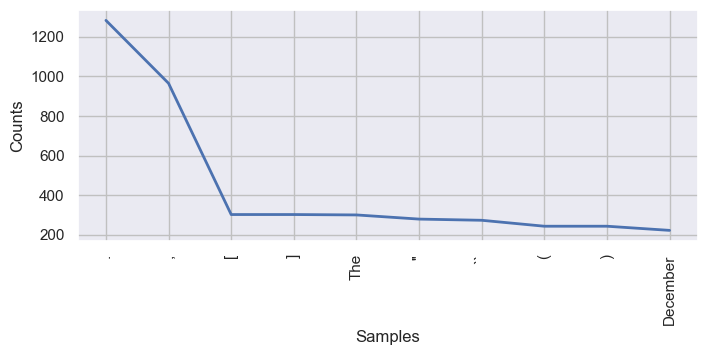

In [90]:
# Frequency Distribution Plot

plt.figure(figsize=(8, 3))
dist_words_filter.plot(10, cumulative = False)
plt.show()

In [91]:
dist_words_filter

FreqDist({'.': 1283, ',': 965, '[': 302, ']': 302, 'The': 300, "''": 279, '``': 273, '(': 243, ')': 243, 'December': 222, ...})

In [92]:
# Substitute all punctuations marks with a space 

sans_punc = re.sub("[^a-zA-Z]",  # Search for all non-letters
                          " ",          # Replace all non-letters with spaces
                          str(filtered_words))

In [93]:
sans_punc

'  Key    events      th    century         WikipediaJump    contentMain    menuMain    menumove    sidebarhide    Navigation    Main    pageContentsCurrent    eventsRandom    articleAbout    WikipediaContact    us    Contribute    HelpLearn    editCommunity    portalRecent    changesUpload    fileSearchSearchDonateAppearanceCreate    accountLog    inPersonal    tools    Create    account    Log    Pages    logged    editors    learn    moreContributionsTalkContentsmove    sidebarhide         Top          Historic    events      th    centuryToggle    Historic    events      th    century    subsection   World    beginning    century               The    war    end    wars               World    War    I                                Russian    Revolution    communism   Between    wars     Economic    depression     The    rise    dictatorship   Global    war         World    War    II                                The    war    Europe     Blitzkrieg     Operation    Barbarossa     T

In [94]:
# Word tokenization

tokenized_word_2 = word_tokenize(sans_punc)
print(tokenized_word_2)

['Key', 'events', 'th', 'century', 'WikipediaJump', 'contentMain', 'menuMain', 'menumove', 'sidebarhide', 'Navigation', 'Main', 'pageContentsCurrent', 'eventsRandom', 'articleAbout', 'WikipediaContact', 'us', 'Contribute', 'HelpLearn', 'editCommunity', 'portalRecent', 'changesUpload', 'fileSearchSearchDonateAppearanceCreate', 'accountLog', 'inPersonal', 'tools', 'Create', 'account', 'Log', 'Pages', 'logged', 'editors', 'learn', 'moreContributionsTalkContentsmove', 'sidebarhide', 'Top', 'Historic', 'events', 'th', 'centuryToggle', 'Historic', 'events', 'th', 'century', 'subsection', 'World', 'beginning', 'century', 'The', 'war', 'end', 'wars', 'World', 'War', 'I', 'Russian', 'Revolution', 'communism', 'Between', 'wars', 'Economic', 'depression', 'The', 'rise', 'dictatorship', 'Global', 'war', 'World', 'War', 'II', 'The', 'war', 'Europe', 'Blitzkrieg', 'Operation', 'Barbarossa', 'Turning', 'tides', 'Operation', 'Overlord', 'Final', 'days', 'The', 'war', 'Pacific', 'Background', 'Japanese

In [95]:
# Create a new FreqDist

dist_words_filter_2 = FreqDist(tokenized_word_2)

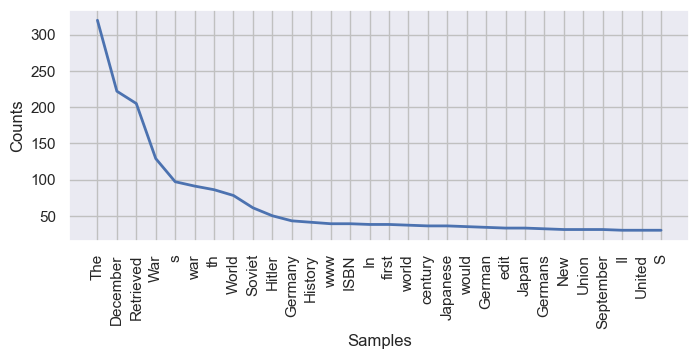

In [96]:
# Frequency Distribution Plot

plt.figure(figsize=(8, 3))
dist_words_filter_2.plot(30, cumulative = False)
plt.show()

In [97]:
dist_words_filter_2.most_common(10)

[('The', 320),
 ('December', 222),
 ('Retrieved', 205),
 ('War', 129),
 ('s', 97),
 ('war', 91),
 ('th', 86),
 ('World', 78),
 ('Soviet', 61),
 ('Hitler', 50)]

In [98]:
# POS Tags with TextBlob

In [99]:
new_stopwords = ["And", "Then", 'n', 't', 's', 'The']

In [100]:
filtered = []
for word in tokenized_word_2:
    if word not in new_stopwords:
        filtered.append(word)

In [101]:
%%time
text = TextBlob(str(filtered))

CPU times: user 9.18 ms, sys: 1.4 ms, total: 10.6 ms
Wall time: 12.4 ms


In [102]:
text

TextBlob("['Key', 'events', 'th', 'century', 'WikipediaJump', 'contentMain', 'menuMain', 'menumove', 'sidebarhide', 'Navigation', 'Main', 'pageContentsCurrent', 'eventsRandom', 'articleAbout', 'WikipediaContact', 'us', 'Contribute', 'HelpLearn', 'editCommunity', 'portalRecent', 'changesUpload', 'fileSearchSearchDonateAppearanceCreate', 'accountLog', 'inPersonal', 'tools', 'Create', 'account', 'Log', 'Pages', 'logged', 'editors', 'learn', 'moreContributionsTalkContentsmove', 'sidebarhide', 'Top', 'Historic', 'events', 'th', 'centuryToggle', 'Historic', 'events', 'th', 'century', 'subsection', 'World', 'beginning', 'century', 'war', 'end', 'wars', 'World', 'War', 'I', 'Russian', 'Revolution', 'communism', 'Between', 'wars', 'Economic', 'depression', 'rise', 'dictatorship', 'Global', 'war', 'World', 'War', 'II', 'war', 'Europe', 'Blitzkrieg', 'Operation', 'Barbarossa', 'Turning', 'tides', 'Operation', 'Overlord', 'Final', 'days', 'war', 'Pacific', 'Background', 'Japanese', 'Expansion', 'A

In [103]:
tags_list = text.tags

In [104]:
tags_list

[('[', 'JJ'),
 ("'Key", 'NNP'),
 ("'", 'POS'),
 ("'events", 'NNS'),
 ("'", 'POS'),
 ("'th", 'NNP'),
 ("'", 'POS'),
 ("'century", 'NNP'),
 ("'", 'POS'),
 ("'WikipediaJump", 'NNP'),
 ("'", 'POS'),
 ("'menumove", 'NNP'),
 ("'", 'POS'),
 ("'sidebarhide", 'NNP'),
 ("'", 'POS'),
 ("'Navigation", 'NN'),
 ("'pageContentsCurrent", 'NNP'),
 ("'", 'POS'),
 ("'eventsRandom", 'NNP'),
 ("'", 'POS'),
 ("'articleAbout", 'IN'),
 ("'WikipediaContact", 'NNP'),
 ("'", 'POS'),
 ("'us", 'NNP'),
 ("'", 'POS'),
 ("'HelpLearn", 'NNP'),
 ("'", 'POS'),
 ("'editCommunity", 'NNP'),
 ("'", 'POS'),
 ("'portalRecent", 'NNP'),
 ("'", 'POS'),
 ("'fileSearchSearchDonateAppearanceCreate", 'NNP'),
 ("'", 'POS'),
 ("'accountLog", 'NNP'),
 ("'", 'POS'),
 ("'inPersonal", 'NNP'),
 ("'", 'POS'),
 ("'tools", 'NNS'),
 ("'", 'POS'),
 ("'Create", 'NNP'),
 ("'", 'POS'),
 ("'account", 'NNP'),
 ("'", 'POS'),
 ("'Log", 'NNP'),
 ("'", 'POS'),
 ("'Pages", 'NNS'),
 ("'", 'POS'),
 ("'logged", 'VBD'),
 ("'editors", 'NNS'),
 ("'", 'POS'),
 

In [105]:
df_text = pd.DataFrame(tags_list)
df_text.columns = ['Words', "Word type"]

In [106]:
df_text.head()

,Words,Word type
0,[,JJ
1,'Key,NNP
2,',POS
3,'events,NNS
4,',POS


In [107]:
df_t = df_text.groupby('Word type').count().reset_index()

In [108]:
df_t.head()

,Word type,Words
0,CC,1
1,CD,75
2,DT,13
3,EX,12
4,FW,43


In [109]:
top15 = df_t.nlargest(15, 'Words')

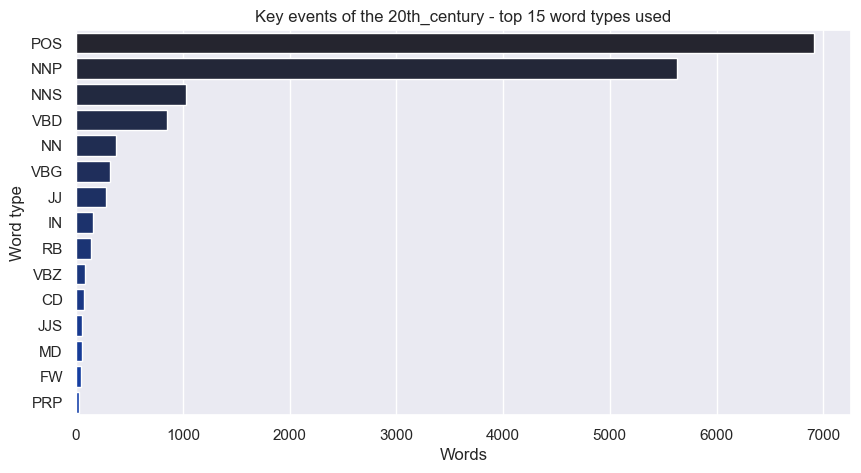

In [110]:
plt.figure(figsize = (10, 5))
with sns.dark_palette("xkcd:blue", 20):
    sns.barplot(x = "Words", y = "Word type",
    saturation = 0.9, data = top15).set_title("Key events of the 20th_century - top 15 word types used")

In [111]:
# def word_analysis(word_type):
#     filtered = [row for row in my_list if str(word_type) in row[1]]
#     print("filtered for " + word_type)
#     df = pd.DataFrame(filtered)
#     df.columns = ["Word", "Occurences"]
#     x=df.groupby('Word').count().reset_index()
#     y=x.sort_values(by=['Occurences'], ascending=False)
#     top15=y.nlargest(15, 'Occurences')
#     plt.figure(figsize=(10, 5))
#     sns.barplot(x="Word", y="Occurences", palette="rocket", saturation=0.9, data=top15).set_title("Lord of the rings - most frequently used "+ word_type +" type word")

In [112]:
# Nouns

In [113]:
df = df_text[(df_text['Word type'] == "NN") | (df_text['Word type'] == "NNS") | (df_text['Word type'] == "NNP")]
df.columns = ["Word", "Occurences"]
x = df.groupby('Word').count().reset_index()
y = x.sort_values(by = ['Occurences'], ascending=False)
top15 = y.nlargest(15, 'Occurences')

In [114]:
top15

,Word,Occurences
285,'December,222
1243,'War,129
2585,'war,91
2505,'th,86
1293,'World,78
1096,'Soviet,61
530,'Hitler,50
529,'History,41
555,'ISBN,39
2618,'www,39


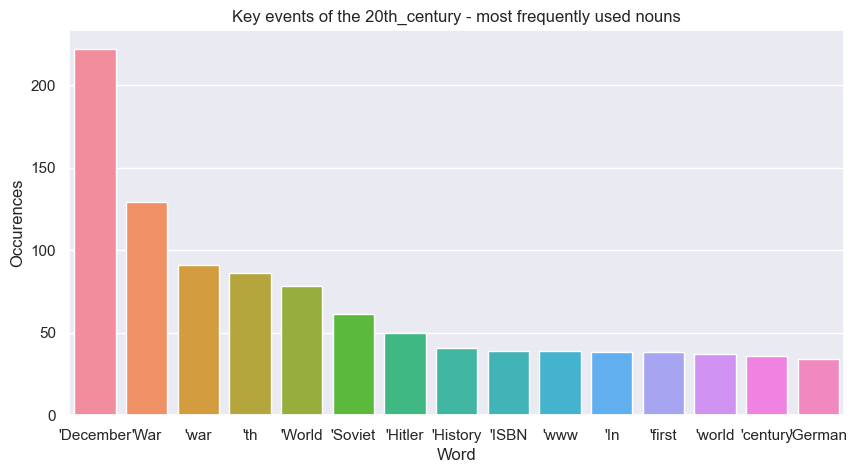

In [115]:
plt.figure(figsize=(10, 5))
with sns.dark_palette("xkcd:blue", 10):
    sns.barplot(x="Word", y="Occurences",
    saturation=0.9, data = top15).set_title("Key events of the 20th_century - most frequently used nouns")

In [116]:
# Verbs

In [117]:
df = df_text[(df_text['Word type'] == "VB")  | (df_text['Word type'] == "VBD")]
df.columns = ["Word", "Occurences"]
x = df.groupby('Word').count().reset_index()
y = x.sort_values(by = ['Occurences'], ascending=False)
top15 = y.nlargest(15, 'Occurences')

In [118]:
top15

,Word,Occurences
27,'Retrieved,205
36,'United,30
0,'Allied,19
196,'led,15
316,'used,13
194,'launched,12
1,'Archived,10
93,'controlled,9
161,'forced,8
77,'changed,7


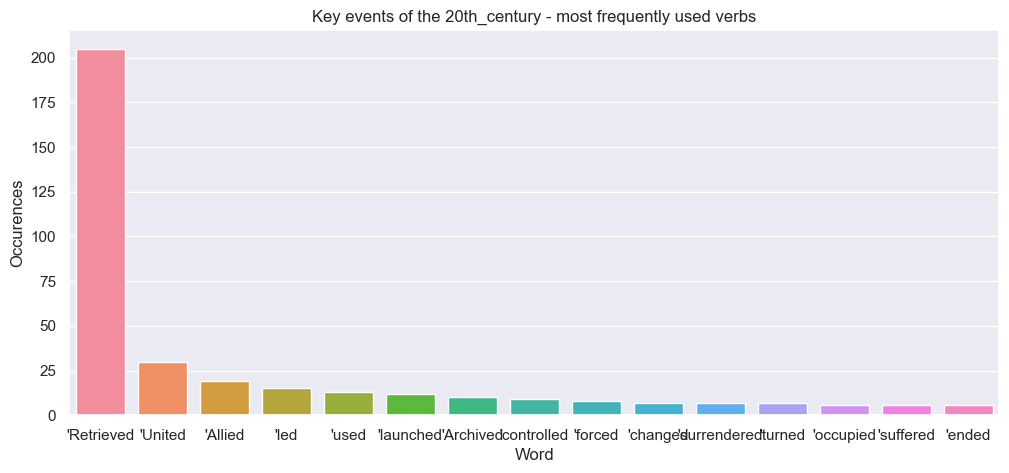

In [119]:
plt.figure(figsize = (12, 5))
with sns.dark_palette("xkcd:blue", 10):
    sns.barplot(x = "Word", y = "Occurences",
    saturation = 0.9, data = top15).set_title("Key events of the 20th_century - most frequently used verbs")

In [120]:
# Adjectives

In [121]:
df = df_text[df_text['Word type'] == "JJ"]
df.columns = ["Word", "Occurences"]
x = df.groupby('Word').count().reset_index()
y = x.sort_values(by=['Occurences'], ascending=False)
top15 = y.nlargest(15, 'Occurences')

In [122]:
top15

,Word,Occurences
27,'Japanese,36
2,'American,24
5,'Atlantic,13
20,'Guardian,10
14,'Chinese,7
42,'Russian,6
1,'African,6
103,'political,6
104,'possible,5
7,'Baltic,5


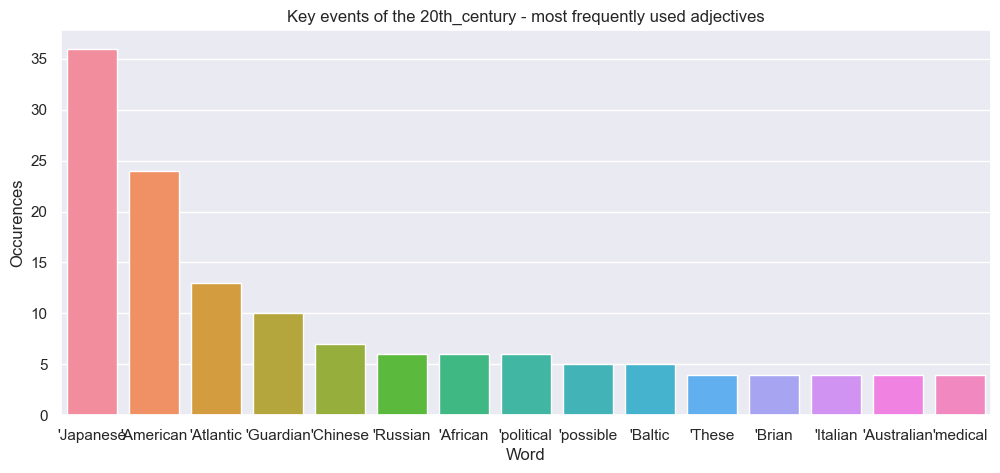

In [123]:
plt.figure(figsize=(12, 5))
with sns.dark_palette("xkcd:blue", 10):
    sns.barplot(x="Word", y="Occurences",
    saturation=0.9, data=top15).set_title("Key events of the 20th_century - most frequently used adjectives")

In [124]:
listToStr = ' '.join([str(elem) for elem in filtered])
 
print(listToStr)

Key events th century WikipediaJump contentMain menuMain menumove sidebarhide Navigation Main pageContentsCurrent eventsRandom articleAbout WikipediaContact us Contribute HelpLearn editCommunity portalRecent changesUpload fileSearchSearchDonateAppearanceCreate accountLog inPersonal tools Create account Log Pages logged editors learn moreContributionsTalkContentsmove sidebarhide Top Historic events th centuryToggle Historic events th century subsection World beginning century war end wars World War I Russian Revolution communism Between wars Economic depression rise dictatorship Global war World War II war Europe Blitzkrieg Operation Barbarossa Turning tides Operation Overlord Final days war Pacific Background Japanese Expansion Allied offensive Final days Holocaust Nuclear Age begins post war world end empires decolonization Cold War War proxy space race end Cold War Information communications technology world end century See also References Sources External linksToggle table contentsK

In [125]:
# Create a count for the main characters

all_counts = Counter(re.sub(r'\W+', ' ', listToStr).split())

In [126]:
all_counts

Counter({'December': 222,
         'Retrieved': 205,
         'War': 129,
         'war': 91,
         'th': 86,
         'World': 78,
         'Soviet': 61,
         'Hitler': 50,
         'Germany': 43,
         'History': 41,
         'www': 39,
         'ISBN': 39,
         'In': 38,
         'first': 38,
         'world': 37,
         'century': 36,
         'Japanese': 36,
         'would': 35,
         'German': 34,
         'edit': 33,
         'Japan': 33,
         'Germans': 32,
         'New': 31,
         'Union': 31,
         'September': 31,
         'II': 30,
         'United': 30,
         'S': 30,
         'ISSN': 30,
         'Europe': 29,
         'also': 29,
         'became': 27,
         'A': 27,
         'com': 27,
         'U': 26,
         'States': 26,
         'nuclear': 26,
         'August': 25,
         'June': 25,
         'Battle': 25,
         'July': 25,
         'end': 24,
         'American': 24,
         'October': 24,
         'history': 23,
      

In [127]:
countries = pd.read_csv("countries_list_20th_century_4.csv", sep=';', index_col = 0)

In [128]:
countries.head()

,country
1,Afghanistan
2,Albania
3,Algeria
4,Andorra
5,Angola


In [202]:
listToStr = ' '.join([str(elem) for elem in filtered])

print(listToStr)

Key events th century WikipediaJump contentMain menuMain menumove sidebarhide Navigation Main pageContentsCurrent eventsRandom articleAbout WikipediaContact us Contribute HelpLearn editCommunity portalRecent changesUpload fileSearchSearchDonateAppearanceCreate accountLog inPersonal tools Create account Log Pages logged editors learn moreContributionsTalkContentsmove sidebarhide Top Historic events th centuryToggle Historic events th century subsection World beginning century war end wars World War I Russian Revolution communism Between wars Economic depression rise dictatorship Global war World War II war Europe Blitzkrieg Operation Barbarossa Turning tides Operation Overlord Final days war Pacific Background Japanese Expansion Allied offensive Final days Holocaust Nuclear Age begins post war world end empires decolonization Cold War War proxy space race end Cold War Information communications technology world end century See also References Sources External linksToggle table contentsK

In [204]:
all_countries = Counter(re.sub(r'\W+', ' ', listToStr).split())

In [206]:
# Replace names with aliases

countries['country'] = countries['country'].replace('Bahamas, The', 'Bahamas')
countries['country'] = countries['country'].replace('Central African Republic ', 'Africa')
countries['country'] = countries['country'].replace('China, Peoples Republic of', 'China')
countries['country'] = countries['country'].replace('Congo, Democratic Republic of the', 'Congo')

In [208]:
countries

,country,country_alias
1,Afghanistan,
2,Albania,
3,Algeria,
4,Andorra,
5,Angola,
...,...,...
205,Sahrawi Arab Democratic Republic,
206,Somaliland,
207,South Ossetia,
208,Taiwan,


In [133]:
countries['country_alias'] = countries['country'].apply(lambda x: x.rsplit(' ', 1)[-1])

In [134]:
countries

,country,country_alias
1,Afghanistan,
2,Albania,
3,Algeria,
4,Andorra,
5,Angola,
...,...,...
205,Sahrawi Arab Democratic Republic,
206,Somaliland,
207,South Ossetia,
208,Taiwan,


In [210]:
country_list = countries['country_alias'].to_list()

In [212]:
dict_of_countries = {d : all_countries[d] for d in country_list}

In [214]:
dict_of_countries

{'': 0,
 'Azerbaijan': 0,
 'Burundi': 0,
 'Republic': 4,
 'Ethiopia': 0,
 'France': 16,
 'Guinea': 4,
 'Guyana': 0,
 'Hungary': 3,
 'Coast': 0,
 'Jordan': 0,
 'Kyrgyzstan': 0,
 'Luxembourg': 1,
 'Myanmar': 0,
 'Norway': 5,
 'Oman': 0,
 'Portugal': 0,
 'Qatar': 0,
 'Rwanda': 0,
 'Syria': 0,
 'Tuvalu': 0,
 'Uzbekistan': 0,
 'Vietnam': 13,
 'Yemen': 0,
 'Zimbabwe': 0,
 'Transnistria': 0}

In [217]:
# Search for the names from the list in the dictionary

dct = {v:[k] for v,k in dict_of_countries.items()}  
df = pd.DataFrame(dct)

In [220]:
df

,,Azerbaijan,Burundi,Republic,Ethiopia,France,Guinea,Guyana,Hungary,Coast,...,Portugal,Qatar,Rwanda,Syria,Tuvalu,Uzbekistan,Vietnam,Yemen,Zimbabwe,Transnistria
0,0,0,0,4,0,16,4,0,3,0,...,0,0,0,0,0,0,13,0,0,0


In [224]:
df = df.transpose().reset_index()

In [227]:
df.dtypes

index    object
0         int64
dtype: object

In [230]:
df

,index,0
0,,0
1,Azerbaijan,0
2,Burundi,0
3,Republic,4
4,Ethiopia,0
5,France,16
6,Guinea,4
7,Guyana,0
8,Hungary,3
9,Coast,0


In [233]:
df.rename(columns = {"index":"Country", 0:"Times mentioned"}, inplace = True)

In [236]:
df

,Country,Times mentioned
0,,0
1,Azerbaijan,0
2,Burundi,0
3,Republic,4
4,Ethiopia,0
5,France,16
6,Guinea,4
7,Guyana,0
8,Hungary,3
9,Coast,0


In [240]:
df.shape

(26, 2)

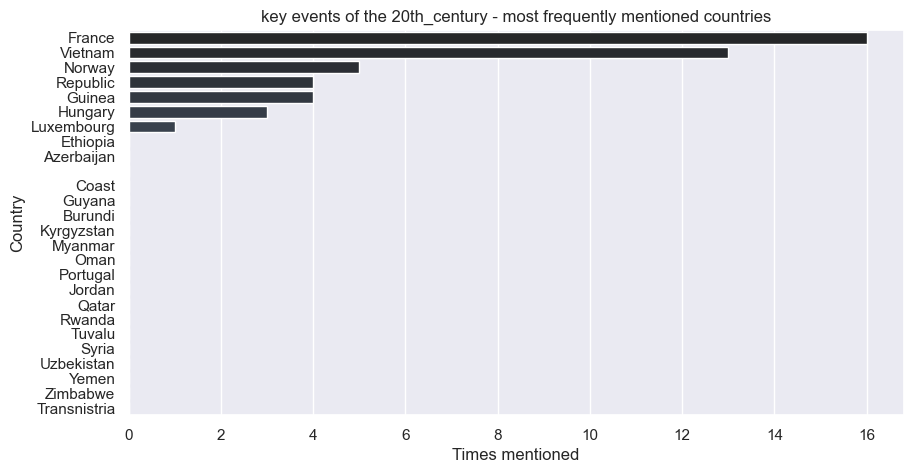

In [245]:
plt.figure(figsize=(10, 5))
with sns.dark_palette("#79C", 27):
    sns.barplot(x = "Times mentioned", y = "Country",
    saturation=0.9, data = df.sort_values("Times mentioned", ascending = False)).set_title("key events of the 20th_century - most frequently mentioned countries")

In [248]:
countries.to_csv("countries list_20th_century.csv")

In [251]:
# Sentiment Analysis

In [254]:
text_sent = TextBlob(str(filtered))

In [257]:
print(text_sent.sentiment)

Sentiment(polarity=0.04912987934051757, subjectivity=0.3542921312729818)


In [262]:
# The polarity score is close to 0, which means the text is neither positive nor negative. The subjectivity score is close to 0 and less than moderate. therefore the key events of 20th_century can be considered as factual collection. 

In [264]:
# END